# Chapter 2: Hierarchical Clustering

## Activity 3

In [1]:
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import sys
%matplotlib inline

# Set sig digits for output
np.set_printoptions(precision=3)

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

<b>Scenario: </b>You are managing store inventory and received a large shipment of wine, but the brand labels fell off the bottles during transit. Fortunately, your supplier provided you with the chemical readings for each bottle along with their respective serial numbers. Unfortunately, you aren’t able to open each bottle of wine and taste test the difference – you must find a way to group the unlabeled bottles back together according to their chemical readings! You know from the order list that you ordered 3 different types of wine and are given only 2 wine attributes to group the wine types back together.

<b>Aim: </b>Implement K-means and Hierarchical Clustering on the wine dataset, and see which approach ends up being more accurate or easier for you to use. Try different combinations of Sci-Kit Learn implementations as well as through using helper functions in SciPy/NumPy.

<b>Outcome: </b>After completing this activity you will have built an intuition for how K-means and Hierarchical Clustering work on similar datasets. You will likely notice that one method performs better than the other depending on how the data is shaped. Another key outcome from this activity is building an understanding for how important hyperparameters are in any given use case.



In [2]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Read in Wine dataset
wine_df = pd.read_csv("wine_data.csv")

In [4]:
# Show sample of data set
print(wine_df.head())

   OD_read  Proline
0     3.92   1065.0
1     3.40   1050.0
2     3.17   1185.0
3     3.45   1480.0
4     2.93    735.0


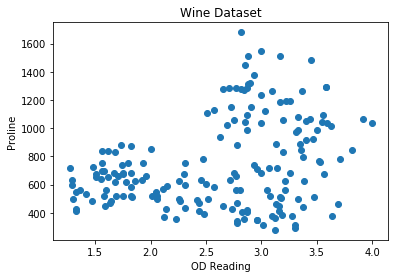

In [5]:
# Visualize the data
plt.scatter(wine_df.values[:,0], wine_df.values[:,1])
plt.title("Wine Dataset")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()

In [6]:
# Generate clusters from K-Means
km = KMeans(3)
km_clusters = km.fit_predict(wine_df)

# Generate clusters using Agglomerative Hierarchical Clustering
ac = AgglomerativeClustering(3, linkage='average')
ac_clusters = ac.fit_predict(wine_df)

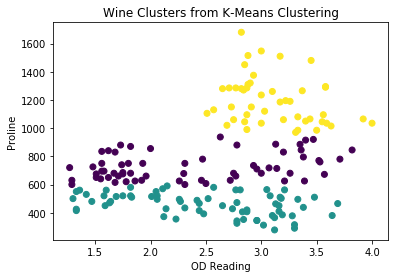

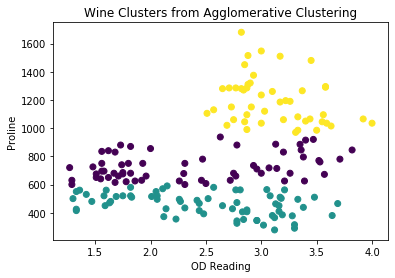

In [7]:
plt.title("Clusters from K-Means")
plt.scatter(wine_df.values[:,0], wine_df.values[:,1], c=km_clusters)
plt.title("Wine Clusters from K-Means Clustering")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()

plt.title("Clusters from Agglomerative Clustering")
plt.scatter(wine_df.values[:,0], wine_df.values[:,1], c=km_clusters)
plt.title("Wine Clusters from Agglomerative Clustering")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()

In [8]:
# Calculate Silhouette Scores
print("Silhouette Scores for Wine Dataset:\n")
print("K-Means Clustering: ", silhouette_score(wine_df, km_clusters))
print("Agg Clustering: ", silhouette_score(wine_df, ac_clusters))

Silhouette Scores for Wine Dataset:

K-Means Clustering:  0.5809421087616886
Agg Clustering:  0.5988495817462


As you can see from the above silhouette metric, Agglomerative Clustering narrowly beats out K-Means Clustering when it comes to separating the clusters by mean intra-cluster distance. This is not the case for every version of Agglomerative Clustering however – try different linkage types and see how the silhouette score and clustering changes between each!